<a href="https://colab.research.google.com/github/fralfaro/MAT281_2023/blob/main/docs/labs/lab_071.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MAT281 - Laboratorio N°071


<a id='p1'></a>
## I.- Problema 01


<img src="https://drive.google.com/uc?export=view&id=1cI62fPIKkkofrAHLQaWLfcIr3qlE1TAZ" width = "350" align="center"/>



Los datos se refieren a las casas encontradas en un distrito determinado de California y algunas estadísticas resumidas sobre ellas basadas en los datos del censo de 1990. Tenga en cuenta que los datos no se limpian, por lo que se requieren algunos pasos de procesamiento previo.

Las columnas son las siguientes, sus nombres se explican por sí mismos:

* longitude
* latitude
* housingmedianage
* total_rooms
* total_bedrooms
* population
* households
* median_income
* medianhousevalue
* ocean_proximity


El objetivo es poder predecir el valor promedio de cada propiedad.
Para poder completar correctamente este laboratorio, es necesario seguir la siguiente rúbrica de trabajo:

1. Definición del problema
2. Estadística descriptiva
3. Visualización descriptiva
4. Preprocesamiento
5. Selección de modelo (Por lo menos debe comparar cuatro modelos)
6. Métricas y análisis de resultados
7. Visualizaciones del modelo
8. Conclusiones

> **Observación**: El alumno tiene la libertad de desarrollar un análisis más completo del problema. Puede tomar como referencia el siguiente [link](https://www.kaggle.com/camnugent/california-housing-prices).

### 1. Definición del problema

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from matplotlib.colors import ListedColormap

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def regression_metrics(df):
    """
    Aplicar las distintas métricas definidas
    :param df: DataFrame con las columnas: ['y', 'yhat']
    :return: DataFrame con las métricas especificadas
    """
    df_result = pd.DataFrame()

    y_true = df['y']
    y_pred = df['yhat']

    df_result['mae'] = [round(mean_absolute_error(y_true, y_pred), 4)]
    df_result['mse'] = [round(mean_squared_error(y_true, y_pred), 4)]
    df_result['rmse'] = [round(np.sqrt(mean_squared_error(y_true, y_pred)), 4)]
    df_result['mape'] = [round(mean_absolute_percentage_error(y_true, y_pred), 4)]
    df_result['smape'] = [round(2 * mean_absolute_percentage_error(y_true, y_pred) / (mean_absolute_percentage_error(y_true, y_pred) + 100), 4)]

    return df_result

In [ ]:
from sklearn.datasets import fetch_california_housing

# Cargar los datos de housing
housing_data = fetch_california_housing(as_frame=True)

# Convertir los datos en un DataFrame de pandas
housing = housing_data['data']
housing['target'] = housing_data['target']

# Visualizar las primeras filas del DataFrame
housing.head(10)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
5,4.0368,52.0,4.761658,1.103627,413.0,2.139896,37.85,-122.25,2.697
6,3.6591,52.0,4.931907,0.951362,1094.0,2.128405,37.84,-122.25,2.992
7,3.1200,52.0,4.797527,1.061824,1157.0,1.788253,37.84,-122.25,2.414
8,2.0804,42.0,4.294118,1.117647,1206.0,2.026891,37.84,-122.26,2.267
9,3.6912,52.0,4.970588,0.990196,1551.0,2.172269,37.84,-122.25,2.611


### 2. Información y estadística descriptiva

In [ ]:
# Información de la Dataframe
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


En este caso, todas las variables involucradas sojn numéricas.

In [ ]:
housing.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


_Comentario: Lo ideal es hacer un análisis univariado con gráficos de barra, para entender como se distribuye cada característica, y luego cruzar datos._

### 3. Visualización descriptiva

MedInc


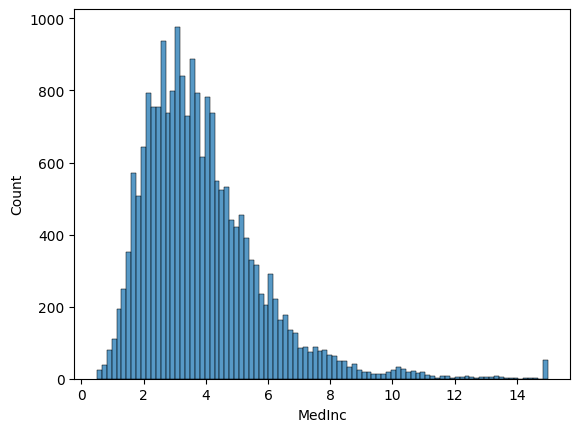

HouseAge


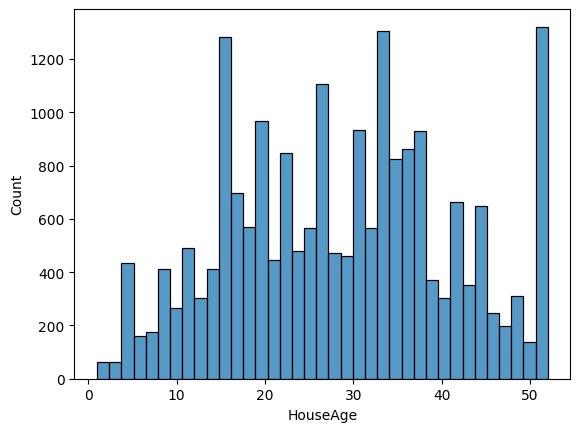

AveRooms


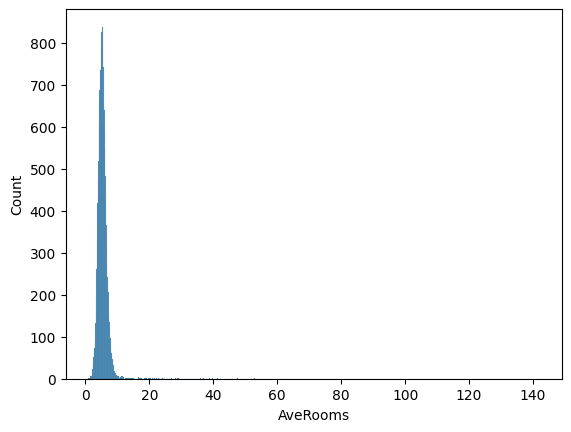

AveBedrms


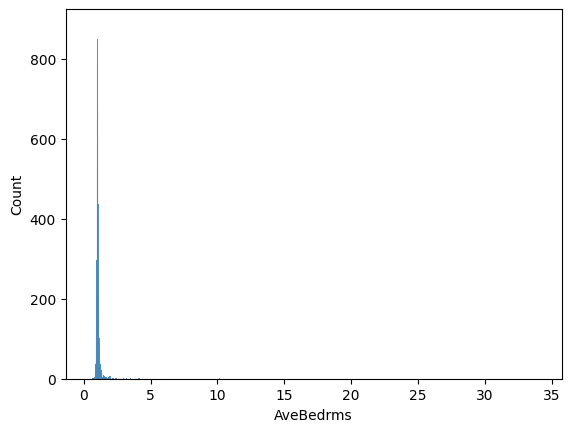

Population


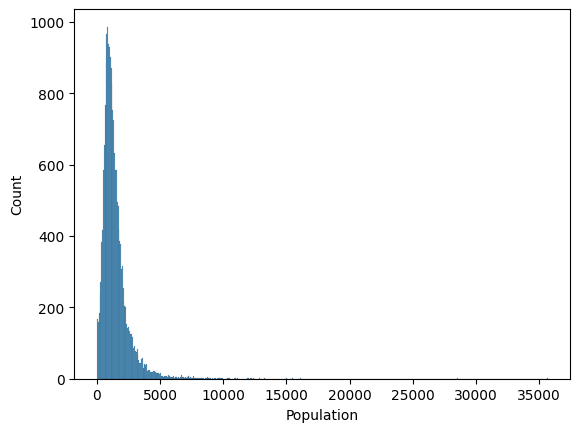

AveOccup


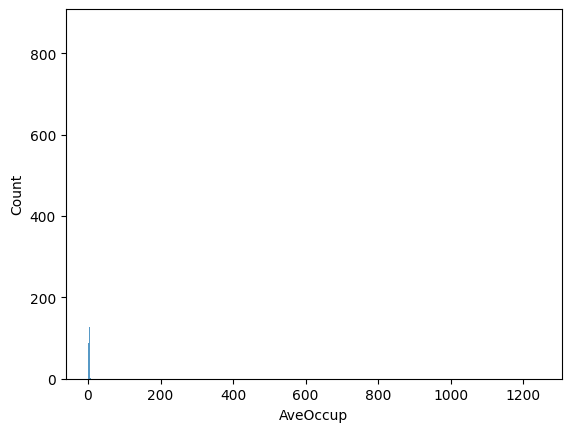

Latitude


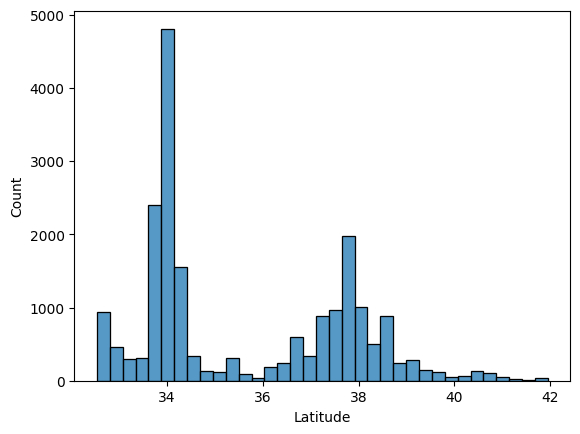

Longitude


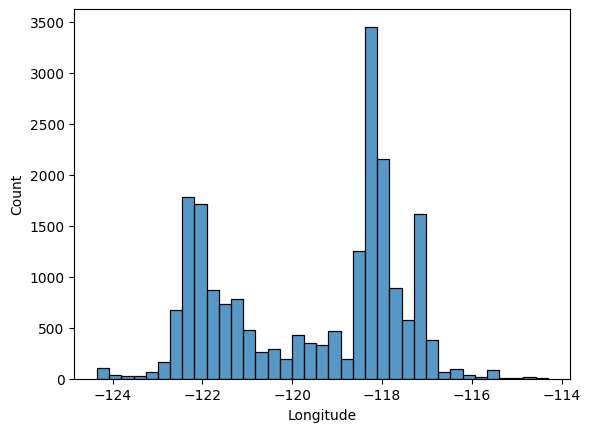

target


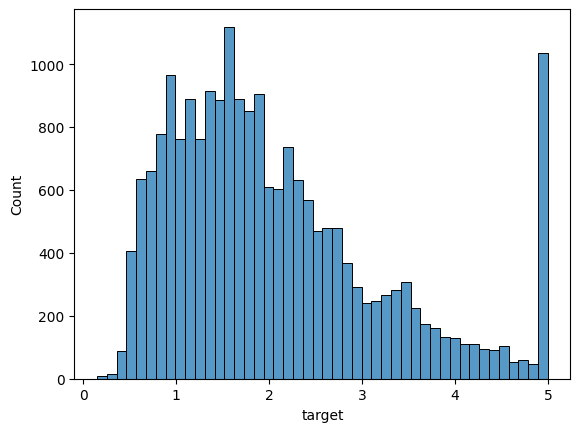

In [ ]:
for col in housing.columns:
  print(col)
  sns.histplot(x=col, data=housing)
  plt.show()

Por ejemplo, la tabla de Promedio de piezas puede modificarse los datos pues se concentra todo en 0 y 5.

_Comentario: En la tarea es necesario detallar cada uno de los gráficos y las tablas, explicando que se hará con c/u._

### 4. Preprocesamiento

In [ ]:
# Manejo de variables numéricas
housing.dropna(inplace=True)

In [ ]:
# Escalado de variables numéricas
scaler = StandardScaler()
housing_scaled = scaler.fit_transform(housing)

In [ ]:
# Separar variables independientes y variables dependientes
X = housing_scaled.copy()
Y = housing['target'].values

In [ ]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state=42)
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de prueba:", len(X_test))

Tamaño del conjunto de entrenamiento: 16512
Tamaño del conjunto de prueba: 4128


### 5. Selección del modelo

In [ ]:
# Modelos
linear_model = LinearRegression()
svr_model = SVR()
rf_model = RandomForestRegressor()
dt_model = DecisionTreeRegressor()

In [ ]:
# Regresión Lineal
start_time = time.time() #inicia
linear_model.fit(X_train, Y_train)
linear_pred = linear_model.predict(X_test)
linear_time = time.time() - start_time # termina
linear_metrics = regression_metrics(pd.DataFrame({'y':Y_test, 'yhat':linear_pred}))

print("Métricas para el model de Regresión Lineal:")
print(linear_metrics)
print("Tiempo de ejecución:", linear_time)

Métricas para el model de Regresión Lineal:
   mae  mse  rmse  mape  smape
0  0.0  0.0   0.0   0.0    0.0
Tiempo de ejecución: 0.05362820625305176


In [ ]:
# Support Vector Machine
start_time = time.time() #inicia
svr_model.fit(X_train, Y_train)
svr_pred = svr_model.predict(X_test)
svr_time = time.time() - start_time # termina
svr_metrics = regression_metrics(pd.DataFrame({'y':Y_test, 'yhat':svr_pred}))

print("Métricas para el modelo de Support Vector Machine:")
print(svr_metrics)
print("Tiempo de ejecución:", svr_time)

Métricas para el modelo de Support Vector Machine:
      mae     mse    rmse    mape   smape
0  0.0497  0.0054  0.0736  3.4273  0.0663
Tiempo de ejecución: 0.8847677707672119


In [ ]:
# Random Forest
start_time = time.time() #inicia
rf_model.fit(X_train, Y_train)
rf_pred = rf_model.predict(X_test)
rf_time = time.time() - start_time # termina
rf_metrics = regression_metrics(pd.DataFrame({'y':Y_test, 'yhat':rf_pred}))

print("Métricas para el modelo de Random Forest:")
print(rf_metrics)
print("Tiempo de ejecución:", rf_time)

Métricas para el modelo de Random Forest:
      mae  mse    rmse    mape   smape
0  0.0002  0.0  0.0011  0.0248  0.0005
Tiempo de ejecución: 11.379854440689087


In [ ]:
# Arbol de decisión
start_time = time.time() #inicia
dt_model.fit(X_train, Y_train)
dt_pred = dt_model.predict(X_test)
dt_time = time.time() - start_time # termina
dt_metrics = regression_metrics(pd.DataFrame({'y':Y_test, 'yhat':dt_pred}))

print("Métricas para el modelo de Support Vector Machine:")
print(dt_metrics)
print("Tiempo de ejecución:", dt_time)

Métricas para el modelo de Support Vector Machine:
      mae  mse    rmse    mape   smape
0  0.0003  0.0  0.0021  0.0423  0.0008
Tiempo de ejecución: 0.14750194549560547


In [ ]:
# R2 Score
linear_r2 = r2_score(Y_test, linear_pred)
svr_r2 = r2_score(Y_test, svr_pred)
rf_r2 = r2_score(Y_test, rf_pred)
dt_r2 = r2_score(Y_test, dt_pred)

print("R2 Score para el modelo de Regresión Lineal:", linear_r2)
print("R2 Score para el modelo de Support Vector Machine:", svr_r2)
print("R2 Score para el modelo de Random Forest:", rf_r2)
print("R2 Score para el modelo de Arbol de decisión:", dt_r2)

R2 Score para el modelo de Regresión Lineal: 1.0
R2 Score para el modelo de Support Vector Machine: 0.9958661752453661
R2 Score para el modelo de Random Forest: 0.9999991323282688
R2 Score para el modelo de Arbol de decisión: 0.9999967469398741


In [ ]:
# Comparación de modelos: Tiempo de ejecución, R^2
name_models = ['Regresión Lineal', 'Support Vector Machine', 'Random Forest', 'Arbol de Decisión']
times = [linear_time, svr_time, rf_time, dt_time]
r2_scores = [linear_r2, svr_r2, rf_r2, dt_r2]

results = pd.DataFrame({'Modelo':name_models, 'Tiempo de Ejecución': times, 'R2 Score':r2_scores})
results.sort_values(by='R2 Score', ascending=False, inplace=True)
results

,Modelo,Tiempo de Ejecución,R2 Score
0,Regresión Lineal,0.053628,1.000000
2,Random Forest,11.379854,0.999999
3,Arbol de Decisión,0.147502,0.999997
1,Support Vector Machine,0.884768,0.995866


El R cuadrado de los cuatro es cercano a 1 o es directamente 1, considerando la cantidad de dígitos decimales. Los cuatro modelos son útiles.

### 6. Métricas y análisis de resultados

In [ ]:
# Comparación de modelos: Métricas
models = [linear_metrics, svr_metrics, rf_metrics, dt_metrics]
name_metrics = ['mae','mse','rmse', 'mape', 'smape']
results = {"Modelo":name_models}

for j in range(len(name_metrics)):
    results[name_metrics[j]] = [models[0][name_metrics[j]][0],
                                models[1][name_metrics[j]][0],
                                models[2][name_metrics[j]][0],
                                models[3][name_metrics[j]][0]]
results = pd.DataFrame(results).sort_values(by='mape', ascending=False)
display(results)

,Modelo,mae,mse,rmse,mape,smape
1,Support Vector Machine,0.0497,0.0054,0.0736,3.4273,0.0663
3,Arbol de Decisión,0.0003,0.0000,0.0021,0.0423,0.0008
2,Random Forest,0.0002,0.0000,0.0011,0.0248,0.0005
0,Regresión Lineal,0.0000,0.0000,0.0000,0.0000,0.0000


El SVR tiene diferencias bastante altas. Los tres modelos siguientes entregan datos que desvian de los originales en un 5% o menos.

Notar que las métricas son mayores para el modelo SVR, mientras que para el modelo de Regresión Lineal parecen ser perfectas. Es decir, aparentemente el mejor modelo que se ajusta debería ser la Regresión Lineal.

Sin embargo, no es posible encontrar un modelo real tan perfecto considerando el ruido, la complejidad, entre otros factores. Además, el tiempo en entregar la respuesta es cercano a 0.

### 7. Visualizaciones del modelo

### 8. Conclusiones

Dado el R^2 y las métricas evaluadas, el mejor modelo se encuentra en las últimas filas de la tabla punto 6. Podríamos tender a considerar la Regresión lineal o el Random Forest como los mejores modelos. Sin embargo, las métricas para el Regresor Lineal nos dicen que puede haber un Overffiting, pues los valores son cercanos sino exactamente cero, teniendo un modelo que predice de manera exacta. Para ello, necesitariamos otro conjunto de prueba y estudiarlo con más detalle.

El mejor modelo será Random Forest.